Final Project: The Game of Life
Objective: Implement using NumPy and matplotlib a custom version of the Game of Life where users can provide their own update rules.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import json

Task 1

In [10]:
# Task 1.1: Initialize life state
def init_life_state_1(n, m, p):
    """
    Generate an initial random subset of life cells (2D points).
    """
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")
    return np.random.choice([0, 1], size=(n, m), p=[1 - p, p])

# Task 1.1: Draw life state
def draw_cell_background(x, y):
    plt.fill([x - 0.5, x - 0.5, x + 0.5, x + 0.5],
             [y - 0.5, y + 0.5, y + 0.5, y - 0.5],
             color='lightgray')

def draw_life_state_1(life_state):
    """
    Display the 2D positions of the selected collection of cells (2D points).
    """
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    rows, cols = np.where(life_state == 1)
    for x, y in zip(rows, cols):
        draw_cell_background(y, x)  # Corrected for plotting orientation
    plt.xlim(-0.5, life_state.shape[1] - 0.5)
    plt.ylim(-0.5, life_state.shape[0] - 0.5)
    plt.gca().invert_yaxis()  # Align visual grid with array indices
    plt.show()

# Task 1.2: Update life state (Bounded Grid)
def update_life_state_1(life_state):
    """
    For each cell evaluate the update rules specified above to obtain its new state.
    Uses a bounded grid (edges treated as dead).
    """
    out_life_state = np.zeros_like(life_state)
    padded_state = np.pad(life_state, pad_width=1, mode='constant', constant_values=0)

    # Calculate the number of neighbors for each cell
    neighbors = (
        padded_state[:-2, :-2] + padded_state[:-2, 1:-1] + padded_state[:-2, 2:] +
        padded_state[1:-1, :-2] +                      0 + padded_state[1:-1, 2:] +
        padded_state[2:, :-2] + padded_state[2:, 1:-1] + padded_state[2:, 2:]
    )

    # Apply Conway's Game of Life rules
    out_life_state[(life_state == 1) & ((neighbors == 2) | (neighbors == 3))] = 1
    out_life_state[(life_state == 0) & (neighbors == 3)] = 1

    return out_life_state


# Task 1.4: Play Game of Life with fixed rules
def play_game_of_life_1():
    """
    Play the Game of Life with fixed rules.
    """
    n = int(input("Enter grid size (rows, e.g., 20): "))
    m = int(input("Enter grid size (columns, e.g., 20): "))
    p = float(input("Enter probability of a cell being alive (0.0 to 1.0, e.g., 0.2): "))

    life_state = init_life_state_1(n, m, p)
    draw_life_state_1(life_state)

    while True:
        iterations = int(input("Enter number of iterations to update (e.g., 10): "))
        for _ in range(iterations):
            life_state = update_life_state_1(life_state)
            draw_life_state_1(life_state)

        cont = input("Do you want to update more? (yes/no): ").lower()
        if cont != 'yes':
            save = input("Do you want to save the initial and final states? (yes/no): ").lower()
            if save == 'yes':
                np.savetxt('initial_state.csv', init_life_state_1(n, m, p), delimiter=',', fmt='%d')
                np.savetxt('final_state.csv', life_state, delimiter=',', fmt='%d')
            break

# Example Usage
if __name__ == "__main__":
    play_game_of_life_1()
    # play_game_of_life_2()

KeyboardInterrupt: Interrupted by user

Task 2

TypeError: draw_cell_background() missing 1 required positional argument: 'color'

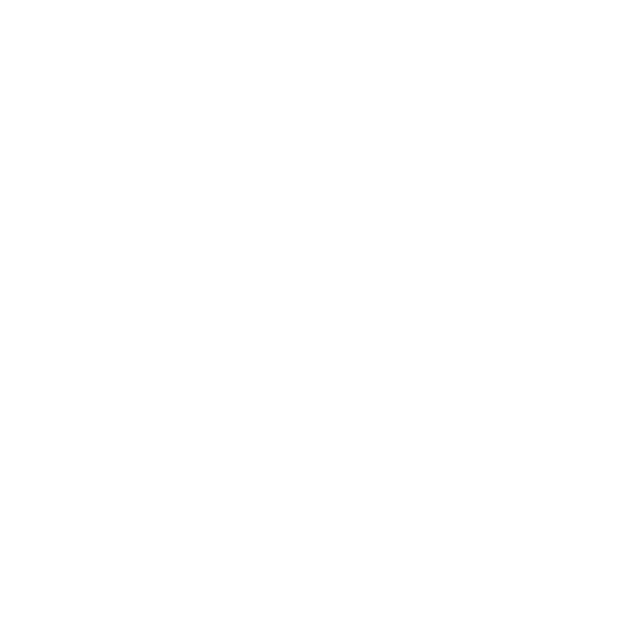

In [12]:

# Task 2.2: Update life state with custom rules (Bounded Grid)
def update_life_state_2(life_state, b1=3, b2=3, d1=2, d2=3):
    """
    Update life state based on user-specified rules.
    Uses a bounded grid (edges treated as dead).
    """
    out_life_state = np.zeros_like(life_state)
    padded_state = np.pad(life_state, pad_width=1, mode='constant', constant_values=0)

    # Calculate the number of neighbors for each cell
    neighbors = (
        padded_state[:-2, :-2] + padded_state[:-2, 1:-1] + padded_state[:-2, 2:] +
        padded_state[1:-1, :-2] +                      0 + padded_state[1:-1, 2:] +
        padded_state[2:, :-2] + padded_state[2:, 1:-1] + padded_state[2:, 2:]
    )

    # Apply custom rules
    out_life_state[(life_state == 1) & ((neighbors >= d1) & (neighbors <= d2))] = 1
    out_life_state[(life_state == 0) & ((neighbors >= b1) & (neighbors <= b2))] = 1

    return out_life_state

# Task 2.4: Play Game of Life with custom rules
def play_game_of_life_2():
    """
    Play the Game of Life with custom rules.
    """
    n = int(input("Enter grid size (rows, e.g., 20): "))
    m = int(input("Enter grid size (columns, e.g., 20): "))
    p = float(input("Enter probability of a cell being alive (0.0 to 1.0, e.g., 0.2): "))

    b1 = int(input("Enter b1 (dead cells to alive lower bound, e.g., 3): "))
    b2 = int(input("Enter b2 (dead cells to alive upper bound, e.g., 3): "))
    d1 = int(input("Enter d1 (alive cells survival lower bound, e.g., 2): "))
    d2 = int(input("Enter d2 (alive cells survival upper bound, e.g., 3): "))

    rules = {"b1": b1, "b2": b2, "d1": d1, "d2": d2}

    life_state = init_life_state_1(n, m, p)
    draw_life_state_1(life_state)

    while True:
        iterations = int(input("Enter number of iterations to update (e.g., 10): "))
        for _ in range(iterations):
            life_state = update_life_state_2(life_state, b1, b2, d1, d2)
            draw_life_state_1(life_state)

        cont = input("Do you want to update more? (yes/no): ").lower()
        if cont != 'yes':
            save = input("Do you want to save the initial and final states? (yes/no): ").lower()
            if save == 'yes':
                np.savetxt('initial_state_custom.csv', init_life_state_1(n, m, p), delimiter=',', fmt='%d')
                np.savetxt('final_state_custom.csv', life_state, delimiter=',', fmt='%d')
                with open('rules.json', 'w') as f:
                    json.dump(rules, f)
            break

# Example Usage
if __name__ == "__main__":
    play_game_of_life_2()
    # play_game_of_life_2()

Task 3

Initial state generated.


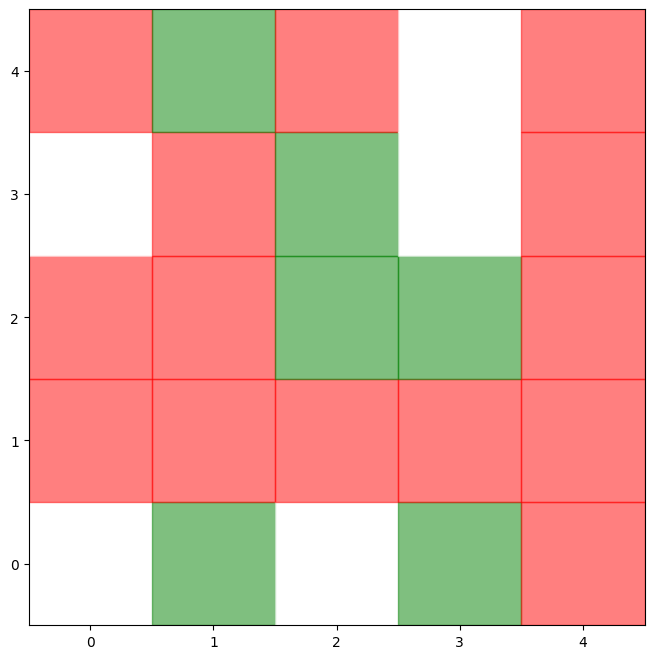

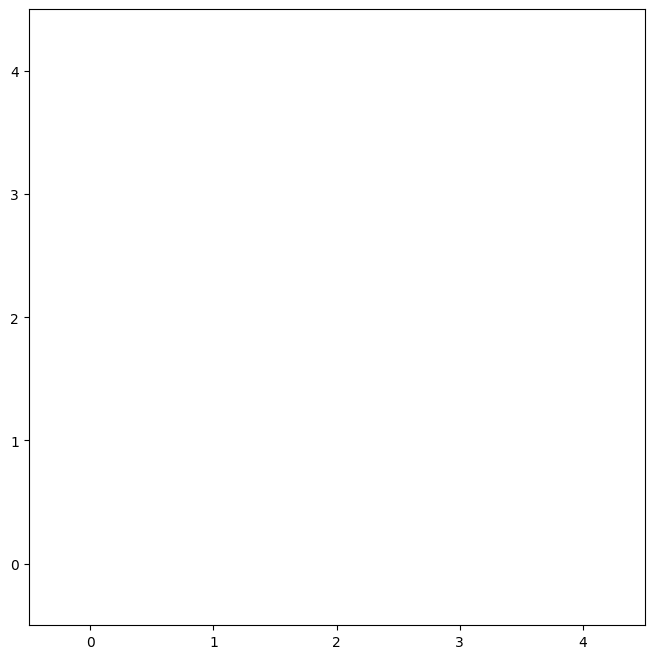

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json

def init_life_state_3(n, m, p_list, states):
    """
    Generate an initial random subset of non-binary cells
    """
    return np.random.choice(states, size=(n, m), p=p_list)

def draw_cell_background(x, y, color):
    plt.fill([x - 0.5, x - 0.5, x + 0.5, x + 0.5], [y - 0.5, y + 0.5, y + 0.5, y - 0.5], color=color, alpha=0.5)

def draw_life_state_3(life_state, colors):
    """
    Display the 2D positions of the selected collection of cells
    """
    plt.figure(figsize=(8, 8))
    for x in range(life_state.shape[0]):
        for y in range(life_state.shape[1]):
            state = life_state[x, y]
            draw_cell_background(x, y, colors[state])
    plt.xlim(-0.5, life_state.shape[0] - 0.5)
    plt.ylim(-0.5, life_state.shape[1] - 0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def update_life_state_3(life_state, rules_dict, out_life_state=None):
    """
    For each cell evaluate the update rules specified above to obtain its new state
    """
    n, m = life_state.shape
    if out_life_state is None:
        out_life_state = np.zeros_like(life_state)

    for x in range(n):
        for y in range(m):
            current_state = life_state[x, y]
            rule_set = rules_dict.get(current_state, [])
            for rule in rule_set:
                if "neighbor_to" in rule:
                    neighbors = life_state[max(0, x - 1):min(n, x + 2), max(0, y - 1):min(m, y + 2)]
                    neighbor_type = rule["neighbor_to"]["if"][0]["type"]
                    at_least = rule["neighbor_to"]["if"][0]["at_least"]
                    at_most = rule["neighbor_to"]["if"][0]["at_most"]
                    count = np.sum(neighbors == neighbor_type)
                    if at_least <= count <= at_most:
                        prob_rules = rule["neighbor_to"]["then"]["probability"]
                        rnd = np.random.random()
                        cumulative = 0
                        for pr in prob_rules:
                            cumulative += pr["value"]
                            if rnd <= cumulative:
                                out_life_state[x, y] = pr["then"]["turn_to"]
                                break
                elif "probability" in rule:
                    prob_rules = rule["probability"]
                    rnd = np.random.random()
                    cumulative = 0
                    for pr in prob_rules:
                        cumulative += pr["value"]
                        if rnd <= cumulative:
                            out_life_state[x, y] = pr["then"]["turn_to"]
                            break
    return out_life_state

def generate_update_life_state_3(rules_dict):
    """
    Generate a function that updates the life state according to the specified rules
    """
    def update_life_state_3_internal(life_state, out_life_state=None):
        return update_life_state_3(life_state, rules_dict, out_life_state)
    return update_life_state_3_internal

def play_game_of_life_3():
    """
    Play the game of life
    """
    n, m = map(int, input("Enter grid dimensions (n m): ").split())
    states = list(map(int, input("Enter possible states (comma-separated): ").split(',')))
    p_list = list(map(float, input("Enter probabilities for each state (comma-separated): ").split(',')))
    colors = input("Enter colors for each state (comma-separated): ").split(',')

    initial_state = init_life_state_3(n, m, p_list, states)
    print("Initial state generated.")

    rules_file = input("Enter the path to the JSON file with rules: ")
    with open(rules_file, 'r') as f:
        rules_dict = json.load(f)

    draw_life_state_3(initial_state, colors)

    current_state = initial_state.copy()
    while True:
        current_state = update_life_state_3(current_state, rules_dict)
        draw_life_state_3(current_state, colors)

        cont = input("Update again? (y/n): ").lower()
        if cont != 'y':
            break

    save = input("Save initial and final states? (y/n): ").lower()
    if save == 'y':
        np.savetxt("initial_state.csv", initial_state, delimiter=',', fmt='%d')
        np.savetxt("final_state.csv", current_state, delimiter=',', fmt='%d')
        with open("rules.json", 'w') as f:
            json.dump(rules_dict, f)
        print("States and rules saved.")

# Running a small demo to test the code (interactive inputs removed for demonstration purposes).
n, m = 10, 10
states = [0, 1, 2]
p_list = [0.2, 0.5, 0.3]
colors = ['blue', 'green', 'red']
rules_dict = {
    0: [{"turn_to": 0}], 
    1: [{"neighbor_to": {"if": [{"type": 2, "at_least": 1, "at_most": 9}], 
                          "then": {"probability": [{"value": 0.25, "then": {"turn_to": 2}}, 
                                                   {"value": 0.75, "then": {"turn_to": 1}}]}}}],
    2: [{"probability": [{"value": 0.5, "then": {"turn_to": 0}}, 
                         {"value": 0.5, "then": {"turn_to": 2}}]}]
}

initial_state = init_life_state_3(n, m, p_list, states)
draw_life_state_3(initial_state, colors)

# Updating once to demonstrate
updated_state = update_life_state_3(initial_state, rules_dict)
draw_life_state_3(updated_state, colors)

# Demonstrating the Game of Life for 5 iterations
iterations = 5
current_state = initial_state.copy()

for i in range(iterations):
    print(f"Iteration {i + 1}")
    draw_life_state_3(current_state, colors)
    current_state = update_life_state_3(current_state, rules_dict)
if __name__ == "__main__":
    play_game_of_life_3()
    # play_game_of_life_2()